Notebook to better understand TFRecords

In [1]:
path_tfrecord = './data/waymo/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord'

In [58]:
from PIL import ImageStat, Image
import numpy as np
import pandas as pd
import seaborn as sns

from collections import Counter
import tensorflow as tf

In [59]:
def get_perceived_brightness(image):
    # convert image to PIL object to calculate the perceived brightness using the formula 
    # (0.21 x R) + (0.72 x G) + (0.07 x B)
    # INPUT: we expect the input as a numpy array
    im = Image.fromarray(np.uint8(image))
    stat = ImageStat.Stat(im)
    r,g,b = stat.mean
    return np.sqrt((0.21*(r**2) + 0.72*(g**2) + 0.07*(b**2)))

In [60]:
def num_objects(path_tfrecord):
    '''This function counts the number of classes that are present in a tfrecord
       and returns a dic of the classes values
    '''
    # Read the information from a single tfrecord
    raw_dataset = tf.data.TFRecordDataset(path_tfrecord)
    # Initialize Counter of Classes to zero
    count_classes = { 1: 0, 2: 0,  4: 0 }
    brightness = []
    
    # Iterate to each element of the tfrecord
    for i, raw_record in enumerate(raw_dataset):
        example = tf.train.Example()
        example.ParseFromString(raw_record.numpy())
        # Iterate to each feature item from the tfrecord
        for k, v in example.features.feature.items():
            # extract the information from the class labels
            if k == 'image/object/class/label':
                values = v.int64_list.value
                count_classes= Counter(count_classes)+ Counter(values)
                
            if k == 'image/encoded':
                # the image is encoded as bytes and originally a jped. For that reason we use the tensorflow
                # method tf.image.decode_jpeg from the tf.io API
                image = tf.image.decode_jpeg(v.bytes_list.value[0]).numpy()
                brightness.extend([get_perceived_brightness(image)])
                
                
        frames = i
    brightness = sum(brightness)/len(brightness)
    return count_classes,frames, brightness

In [63]:
classes_list = []
frames_list = []
fileName_list = []
brightness_list = []

for file in glob.glob('./data/waymo/segment*.tfrecord'):
    count_classes, frames, brightness = num_objects(file)
    classes_list.extend([count_classes])
    frames_list.extend([frames])
    brightness_list.extend([brightness])
    fileName_list.extend([file])
    

Create a dataframe out of the information for simpler handling

In [88]:
vehicles = []
pedestrians = []
cyclists = []
for idx in range(len(fileName_list)):
    vehicles.extend([classes_list[idx][1]])
    pedestrians.extend([classes_list[idx][2]])
    cyclists.extend([classes_list[idx][4]])

In [93]:
dict = {'Vehicles': vehicles,
       'Pedestrians': pedestrians,
       'Cyclists': cyclists,
       'brightness_mean': brightness_list,
       'fileName': fileName_list,
       'frames': frames}

In [98]:
df = pd.DataFrame(dict)
df.set_index('fileName', inplace = True)

In [145]:
pd.set_option('display.max_rows', None)
df

Vehicles  Pedestrians  \
fileName                                                                    
./data/waymo/segment-10724020115992582208_7660_...       491           36   
./data/waymo/segment-10206293520369375008_2796_...       881           78   
./data/waymo/segment-10082223140073588526_6140_...      2799          539   
./data/waymo/segment-10975280749486260148_940_0...      1079            0   
./data/waymo/segment-10241508783381919015_2889_...      1009          440   
./data/waymo/segment-10107710434105775874_760_0...       621            0   
./data/waymo/segment-10226164909075980558_180_0...      4239         1546   
./data/waymo/segment-10584247114982259878_490_0...      1155            0   
./data/waymo/segment-11355519273066561009_5323_...      2346            0   
./data/waymo/segment-11070802577416161387_740_0...      5359         7395   
./data/waymo/segment-11252086830380107152_1540_...      2126         5707   
./data/waymo/segment-10734565072045778791_440_0...       466          273   
./data/waymo/segment-11139647661584646830_5470_...       813            0   
./data/waymo/segment-10923963890428322967_1445_...      6064            0   
./data/waymo/segment-11454085070345530663_1905_...      1264            0   
./data/waymo/segment-1146261869236413282_1680_0...      4032         1983   
./data/waymo/segment-11388947676680954806_5427_...      5024         1208   
./data/waymo/segment-11318901554551149504_520_0...      6600         2337   
./data/waymo/segment-1172406780360799916_1660_0...      2354          249   
./data/waymo/segment-11847506886204460250_1640_...      5606         2804   
./data/waymo/segment-10231929575853664160_1160_...      6072         1912   
./data/waymo/segment-10498013744573185290_1240_...      3351         3059   
./data/waymo/segment-11076364019363412893_1711_...      1155            0   
./data/waymo/segment-10664823084372323928_4360_...      3032         4163   
./data/waymo/segment-10327752107000040525_1120_...      2410            0   
./data/waymo/segment-11718898130355901268_2300_...      3153         2976   
./data/waymo/segment-10500357041547037089_1474_...      5242          196   
./data/waymo/segment-10094743350625019937_3420_...      5743            0   
./data/waymo/segment-11489533038039664633_4820_...       530          433   
./data/waymo/segment-1208303279778032257_1360_0...      1869            0   
./data/waymo/segment-10964956617027590844_1584_...       428           94   
./data/waymo/segment-10061305430875486848_1080_...      2052          109   
./data/waymo/segment-10599748131695282446_1380_...      2716         2947   
./data/waymo/segment-10517728057304349900_3360_...       635            0   
./data/waymo/segment-10212406498497081993_5300_...      3824          751   
./data/waymo/segment-11486225968269855324_92_00...      2570            9   
./data/waymo/segment-11566385337103696871_5740_...      2500            0   
./data/waymo/segment-11839652018869852123_2565_...      4840            0   
./data/waymo/segment-10963653239323173269_1924_...      5923          872   
./data/waymo/segment-10588771936253546636_2300_...      4223          459   
./data/waymo/segment-10676267326664322837_311_1...      2445           41   
./data/waymo/segment-11623618970700582562_2840_...       376            0   
./data/waymo/segment-10235335145367115211_5420_...      6781          218   
./data/waymo/segment-10876852935525353526_1640_...      3709          632   
./data/waymo/segment-10940952441434390507_1888_...      1446            0   
./data/waymo/segment-11119453952284076633_1369_...      1605           65   
./data/waymo/segment-10023947602400723454_1120_...      4462         3871   
./data/waymo/segment-11940460932056521663_1760_...      8472         3435   
./data/waymo/segment-11343624116265195592_5910_...      4109          171   
./data/waymo/segment-10096619443888687526_2820_...       716            0   
./data/waymo/segment-10455472356147194054_1560_.

<IPython.core.display.Javascript object>


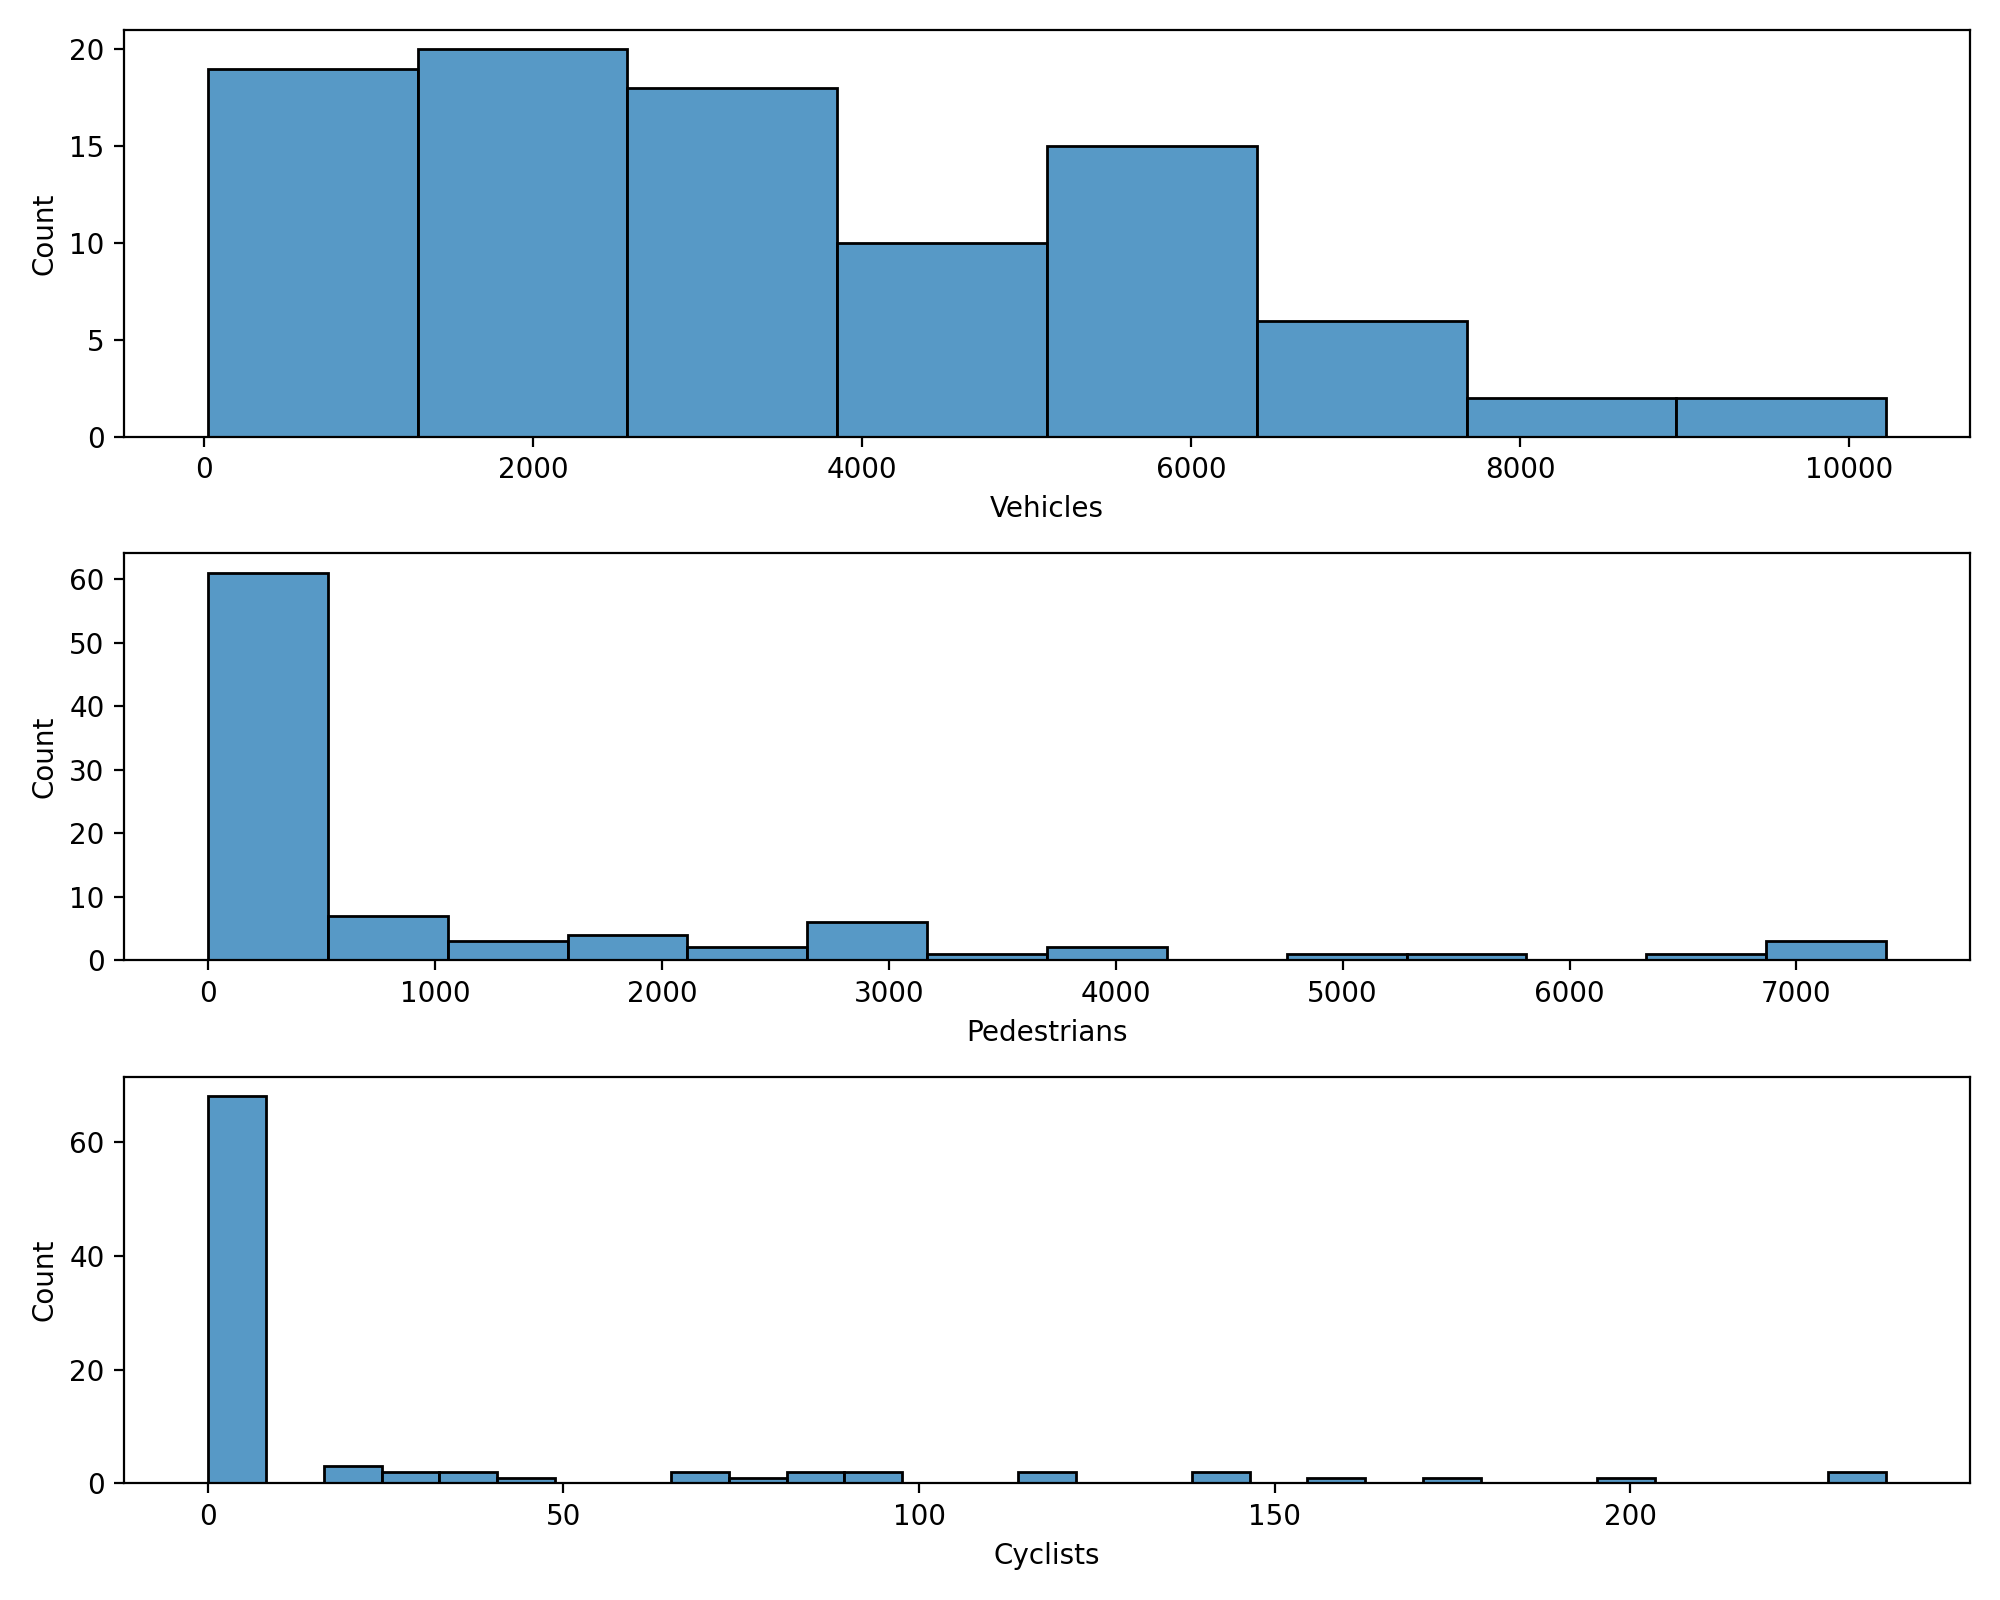

In [110]:
%matplotlib notebook

fig, axs = plt.subplots(3,1,figsize = (10,8))
sns.histplot(df['Vehicles'], ax = axs[0])
sns.histplot(df['Pedestrians'], ax = axs[1])
sns.histplot(df['Cyclists'], ax = axs[2])
plt.tight_layout()

<IPython.core.display.Javascript object>


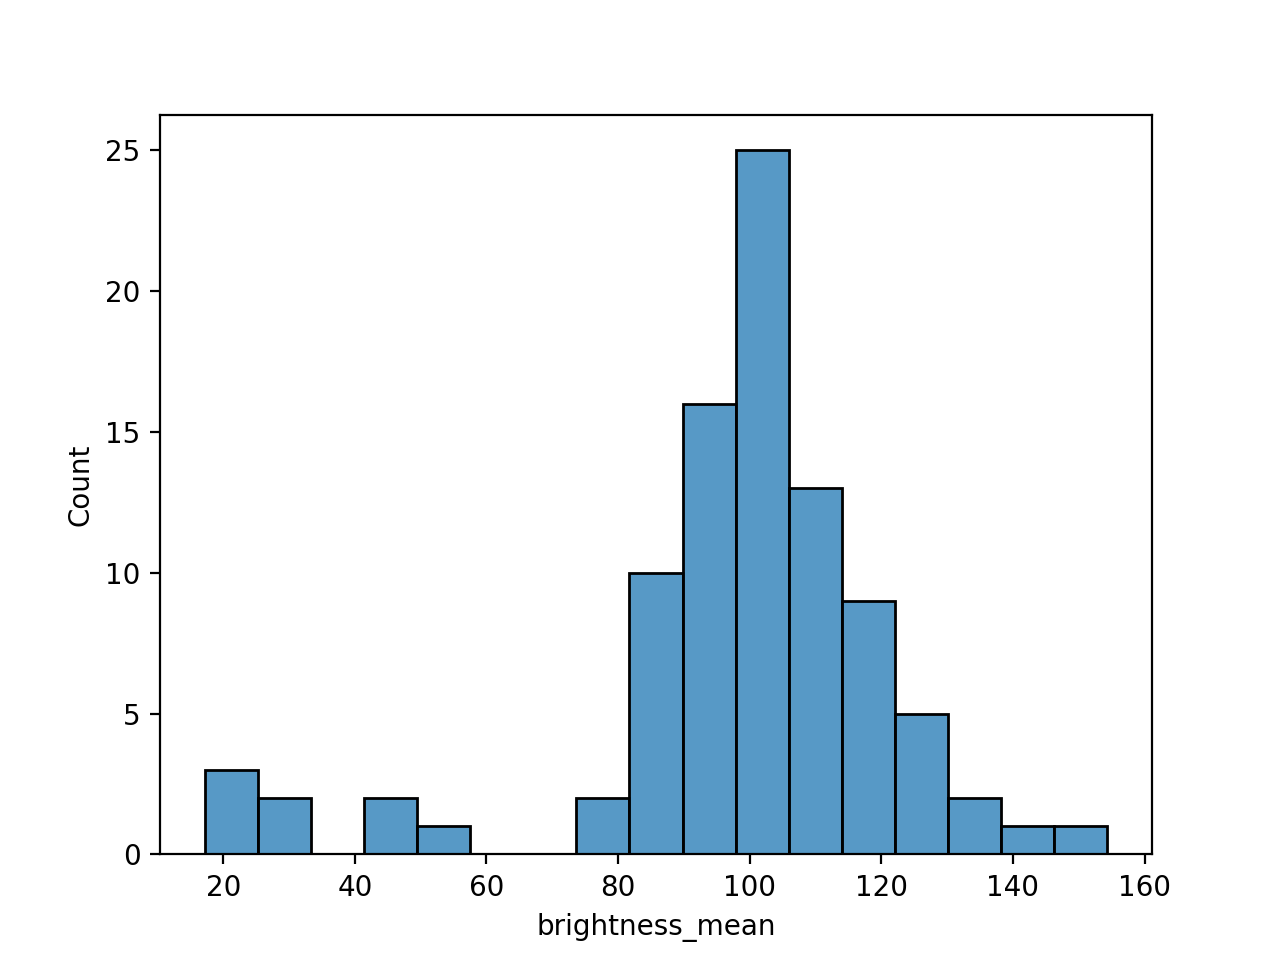

<AxesSubplot:xlabel='brightness_mean', ylabel='Count'>

In [112]:
plt.figure()
sns.histplot(df['brightness_mean'])

Let's see what tfrecords are taken during the night

In [115]:
df.sort_values(by = 'brightness_mean', inplace = True)

In [155]:
df_night = df[df['brightness_mean']<70]
num_night_scenes = len(df_night)
print("There are " + str(num_night_scenes) + ' night scenes')
df_night

There are 8 night scenes


Vehicles  Pedestrians  \
fileName                                                                    
./data/waymo/segment-10724020115992582208_7660_...       491           36   
./data/waymo/segment-10206293520369375008_2796_...       881           78   
./data/waymo/segment-10082223140073588526_6140_...      2799          539   
./data/waymo/segment-10975280749486260148_940_0...      1079            0   
./data/waymo/segment-10241508783381919015_2889_...      1009          440   
./data/waymo/segment-10107710434105775874_760_0...       621            0   
./data/waymo/segment-10226164909075980558_180_0...      4239         1546   
./data/waymo/segment-10584247114982259878_490_0...      1155            0   

                                                    Cyclists  brightness_mean  \
fileName                                                                        
./data/waymo/segment-10724020115992582208_7660_...       116        17.243861   
./data/waymo/segment-10206293520369375008_2796_...         0        20.668780   
./data/waymo/segment-10082223140073588526_6140_...         0        21.981620   
./data/waymo/segment-10975280749486260148_940_0...         0        28.281604   
./data/waymo/segment-10241508783381919015_2889_...         0        30.923921   
./data/waymo/segment-10107710434105775874_760_0...         0        43.795894   
./data/waymo/segment-10226164909075980558_180_0...         0        46.708783   
./data/waymo/segment-10584247114982259878_490_0...         0        52.578842   

                                                    frames  
fileName                                                    
./data/waymo/segment-10724020115992582208_7660_...     197  
./data/waymo/segment-10206293520369375008_2796_...     197  
./data/waymo/segment-10082223140073588526_6140_...     197  
./data/waymo/segment-10975280749486260148_940_0...     197  
./data/waymo/segment-10241508783381919015_2889_...     197  
./data/waymo/segment-10107710434105775874_760_0...     197  
./data/waymo/segment-10226164909075980558_180_0...     197  
./data/waymo/segment-10584247114982259878_490_0...     197

Let's plot one frame of the one with the highest brightness to verify

In [156]:
file2load = df_night.iloc[-1].name

<IPython.core.display.Javascript object>


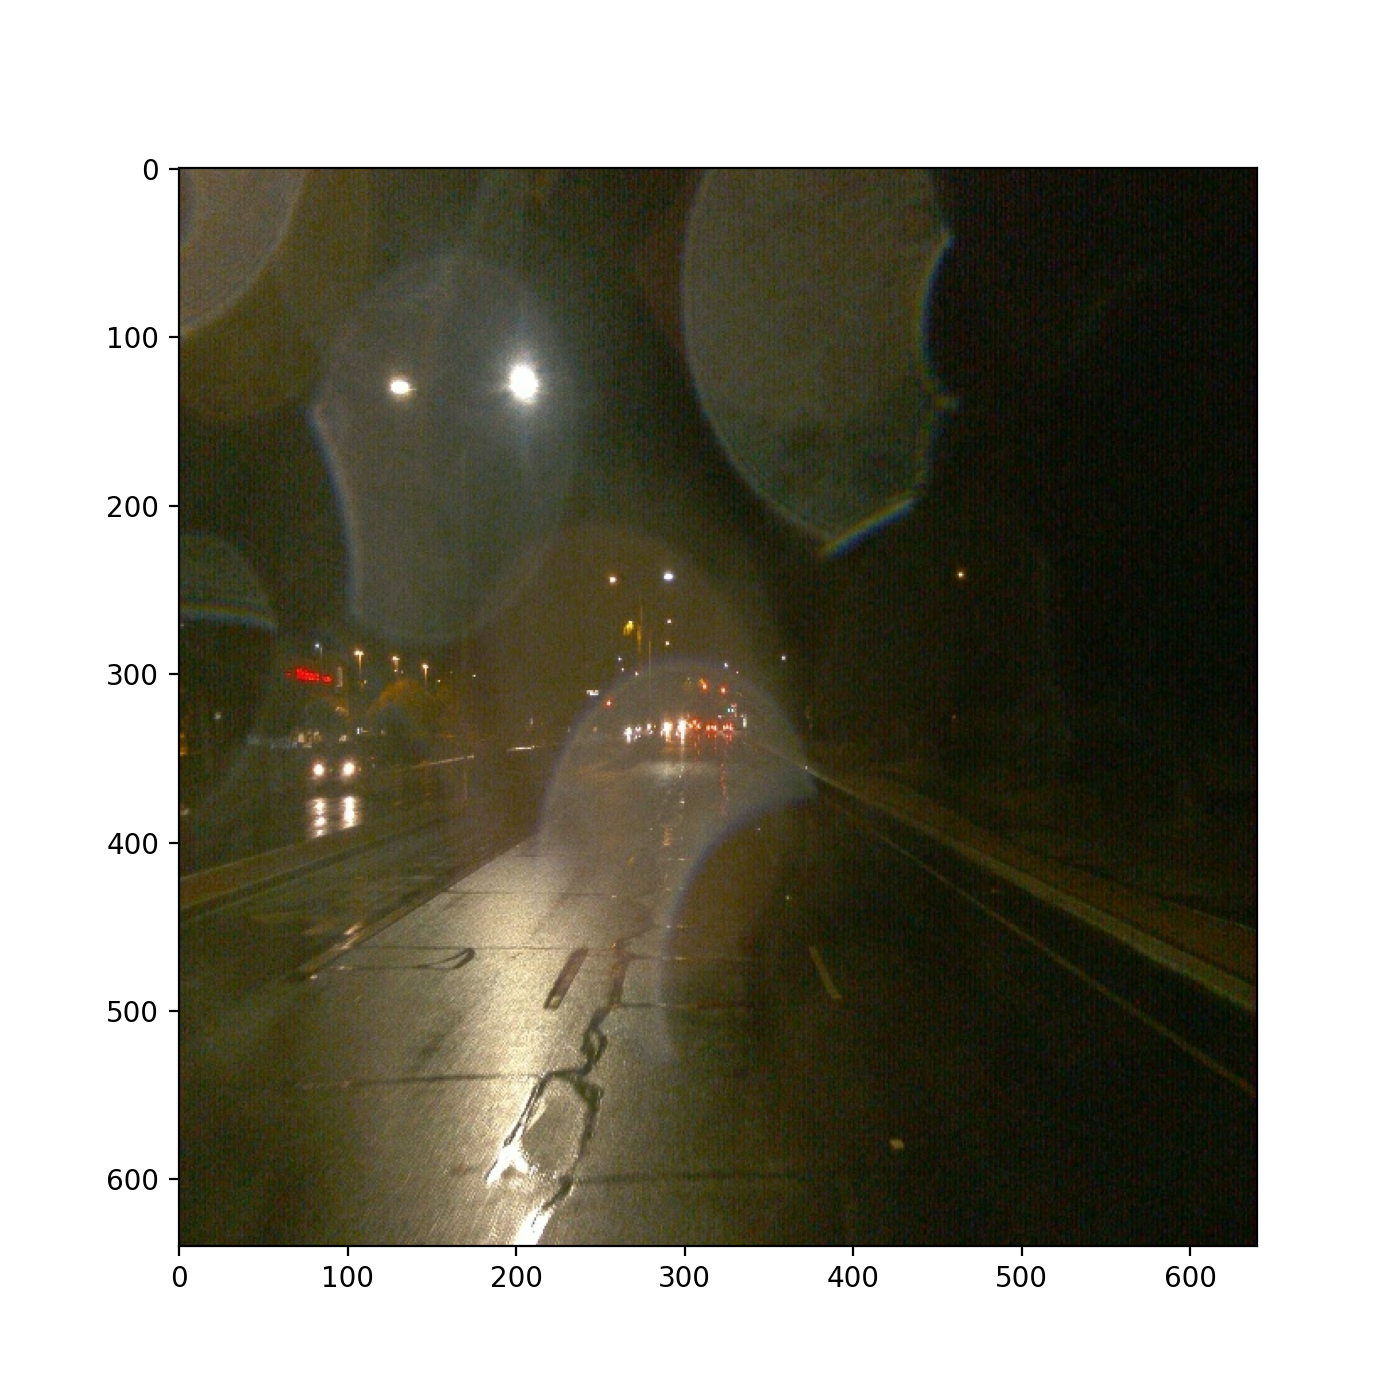

In [157]:
# Read the information from a single tfrecord
raw_dataset = tf.data.TFRecordDataset(file2load)
    
# Iterate to each element of the tfrecord
for raw_record in raw_dataset.take(1):
    example = tf.train.Example()
    example.ParseFromString(raw_record.numpy())
    # Iterate to each feature item from the tfrecord
    for k, v in example.features.feature.items():
        # extract the information from the class labels                
            if k == 'image/encoded':
                # the image is encoded as bytes and originally a jped. For that reason we use the tensorflow
                # method tf.image.decode_jpeg from the tf.io API
                image = tf.image.decode_jpeg(v.bytes_list.value[0]).numpy()
                plt.figure(figsize = (7,7))
                plt.imshow(image)

# Creation of Splits
For the creation of the different splits we will shuffle the data using scikit-learn function `shuffle`

In [160]:
from sklearn.utils import shuffle
df = shuffle(df)
df

Vehicles  Pedestrians  \
fileName                                                                    
./data/waymo/segment-10770759614217273359_1465_...      6188            0   
./data/waymo/segment-1005081002024129653_5313_1...      2799          272   
./data/waymo/segment-1191788760630624072_3880_0...      3700            0   
./data/waymo/segment-10235335145367115211_5420_...      6781          218   
./data/waymo/segment-10500357041547037089_1474_...      5242          196   
./data/waymo/segment-10241508783381919015_2889_...      1009          440   
./data/waymo/segment-10206293520369375008_2796_...       881           78   
./data/waymo/segment-11070802577416161387_740_0...      5359         7395   
./data/waymo/segment-10793018113277660068_2714_...      2931          157   
./data/waymo/segment-10444454289801298640_4360_...      5047         2750   
./data/waymo/segment-10975280749486260148_940_0...      1079            0   
./data/waymo/segment-10231929575853664160_1160_...      6072         1912   
./data/waymo/segment-10963653239323173269_1924_...      5923          872   
./data/waymo/segment-10455472356147194054_1560_...      6645          711   
./data/waymo/segment-11799592541704458019_9828_...      5734          418   
./data/waymo/segment-11219370372259322863_5320_...      3019           37   
./data/waymo/segment-10094743350625019937_3420_...      5743            0   
./data/waymo/segment-11940460932056521663_1760_...      8472         3435   
./data/waymo/segment-10750135302241325253_180_0...      2610          160   
./data/waymo/segment-1172406780360799916_1660_0...      2354          249   
./data/waymo/segment-1083056852838271990_4080_0...      3696          106   
./data/waymo/segment-11928449532664718059_1200_...      6085         2824   
./data/waymo/segment-11119453952284076633_1369_...      1605           65   
./data/waymo/segment-10072140764565668044_4060_...     10226         1281   
./data/waymo/segment-11489533038039664633_4820_...       530          433   
./data/waymo/segment-10498013744573185290_1240_...      3351         3059   
./data/waymo/segment-11925224148023145510_1040_...      7407         5012   
./data/waymo/segment-10734565072045778791_440_0...       466          273   
./data/waymo/segment-10526338824408452410_5714_...      3213          108   
./data/waymo/segment-11392401368700458296_1086_...      6116            0   
./data/waymo/segment-11017034898130016754_697_8...      1623           53   
./data/waymo/segment-10096619443888687526_2820_...       716            0   
./data/waymo/segment-10072231702153043603_5725_...      1066           97   
./data/waymo/segment-11388947676680954806_5427_...      5024         1208   
./data/waymo/segment-11199484219241918646_2810_...      2406            0   
./data/waymo/segment-10075870402459732738_1060_...      2856            0   
./data/waymo/segment-10226164909075980558_180_0...      4239         1546   
./data/waymo/segment-10676267326664322837_311_1...      2445           41   
./data/waymo/segment-10940952441434390507_1888_...      1446            0   
./data/waymo/segment-10625026498155904401_200_0...      8897          198   
./data/waymo/segment-1022527355599519580_4866_9...      4915         1790   
./data/waymo/segment-10391312872392849784_4099_...      2126           73   
./data/waymo/segment-11236550977973464715_3620_...      5978         6897   
./data/waymo/segment-11113047206980595400_2560_...      1330         6927   
./data/waymo/segment-11343624116265195592_5910_...      4109          171   
./data/waymo/segment-11355519273066561009_5323_...      2346            0   
./data/waymo/segment-11060291335850384275_3761_...      1163           42   
./data/waymo/segment-11318901554551149504_520_0...      6600         2337   
./data/waymo/segment-10724020115992582208_7660_...       491           36   
./data/waymo/segment-10017090168044687777_6380_...      2127            0   
./data/waymo/segment-11004685739714500220_2300_.

We will take to start with the classical approach of 60% / 20% / 20% and see how the distribution looks like

In [161]:
number_tf_records = len(df)

In [162]:
number_tf_records

92

In [183]:
# calculate lengths
train_len = int(number_tf_records * 0.6)
val_len = int(number_tf_records * 0.2)

# extract dataFrames
df_train = df[:train_len]
df_val = df[train_len: (train_len + val_len)]
df_test = df[(train_len + val_len):]

Plot the distributions

<IPython.core.display.Javascript object>


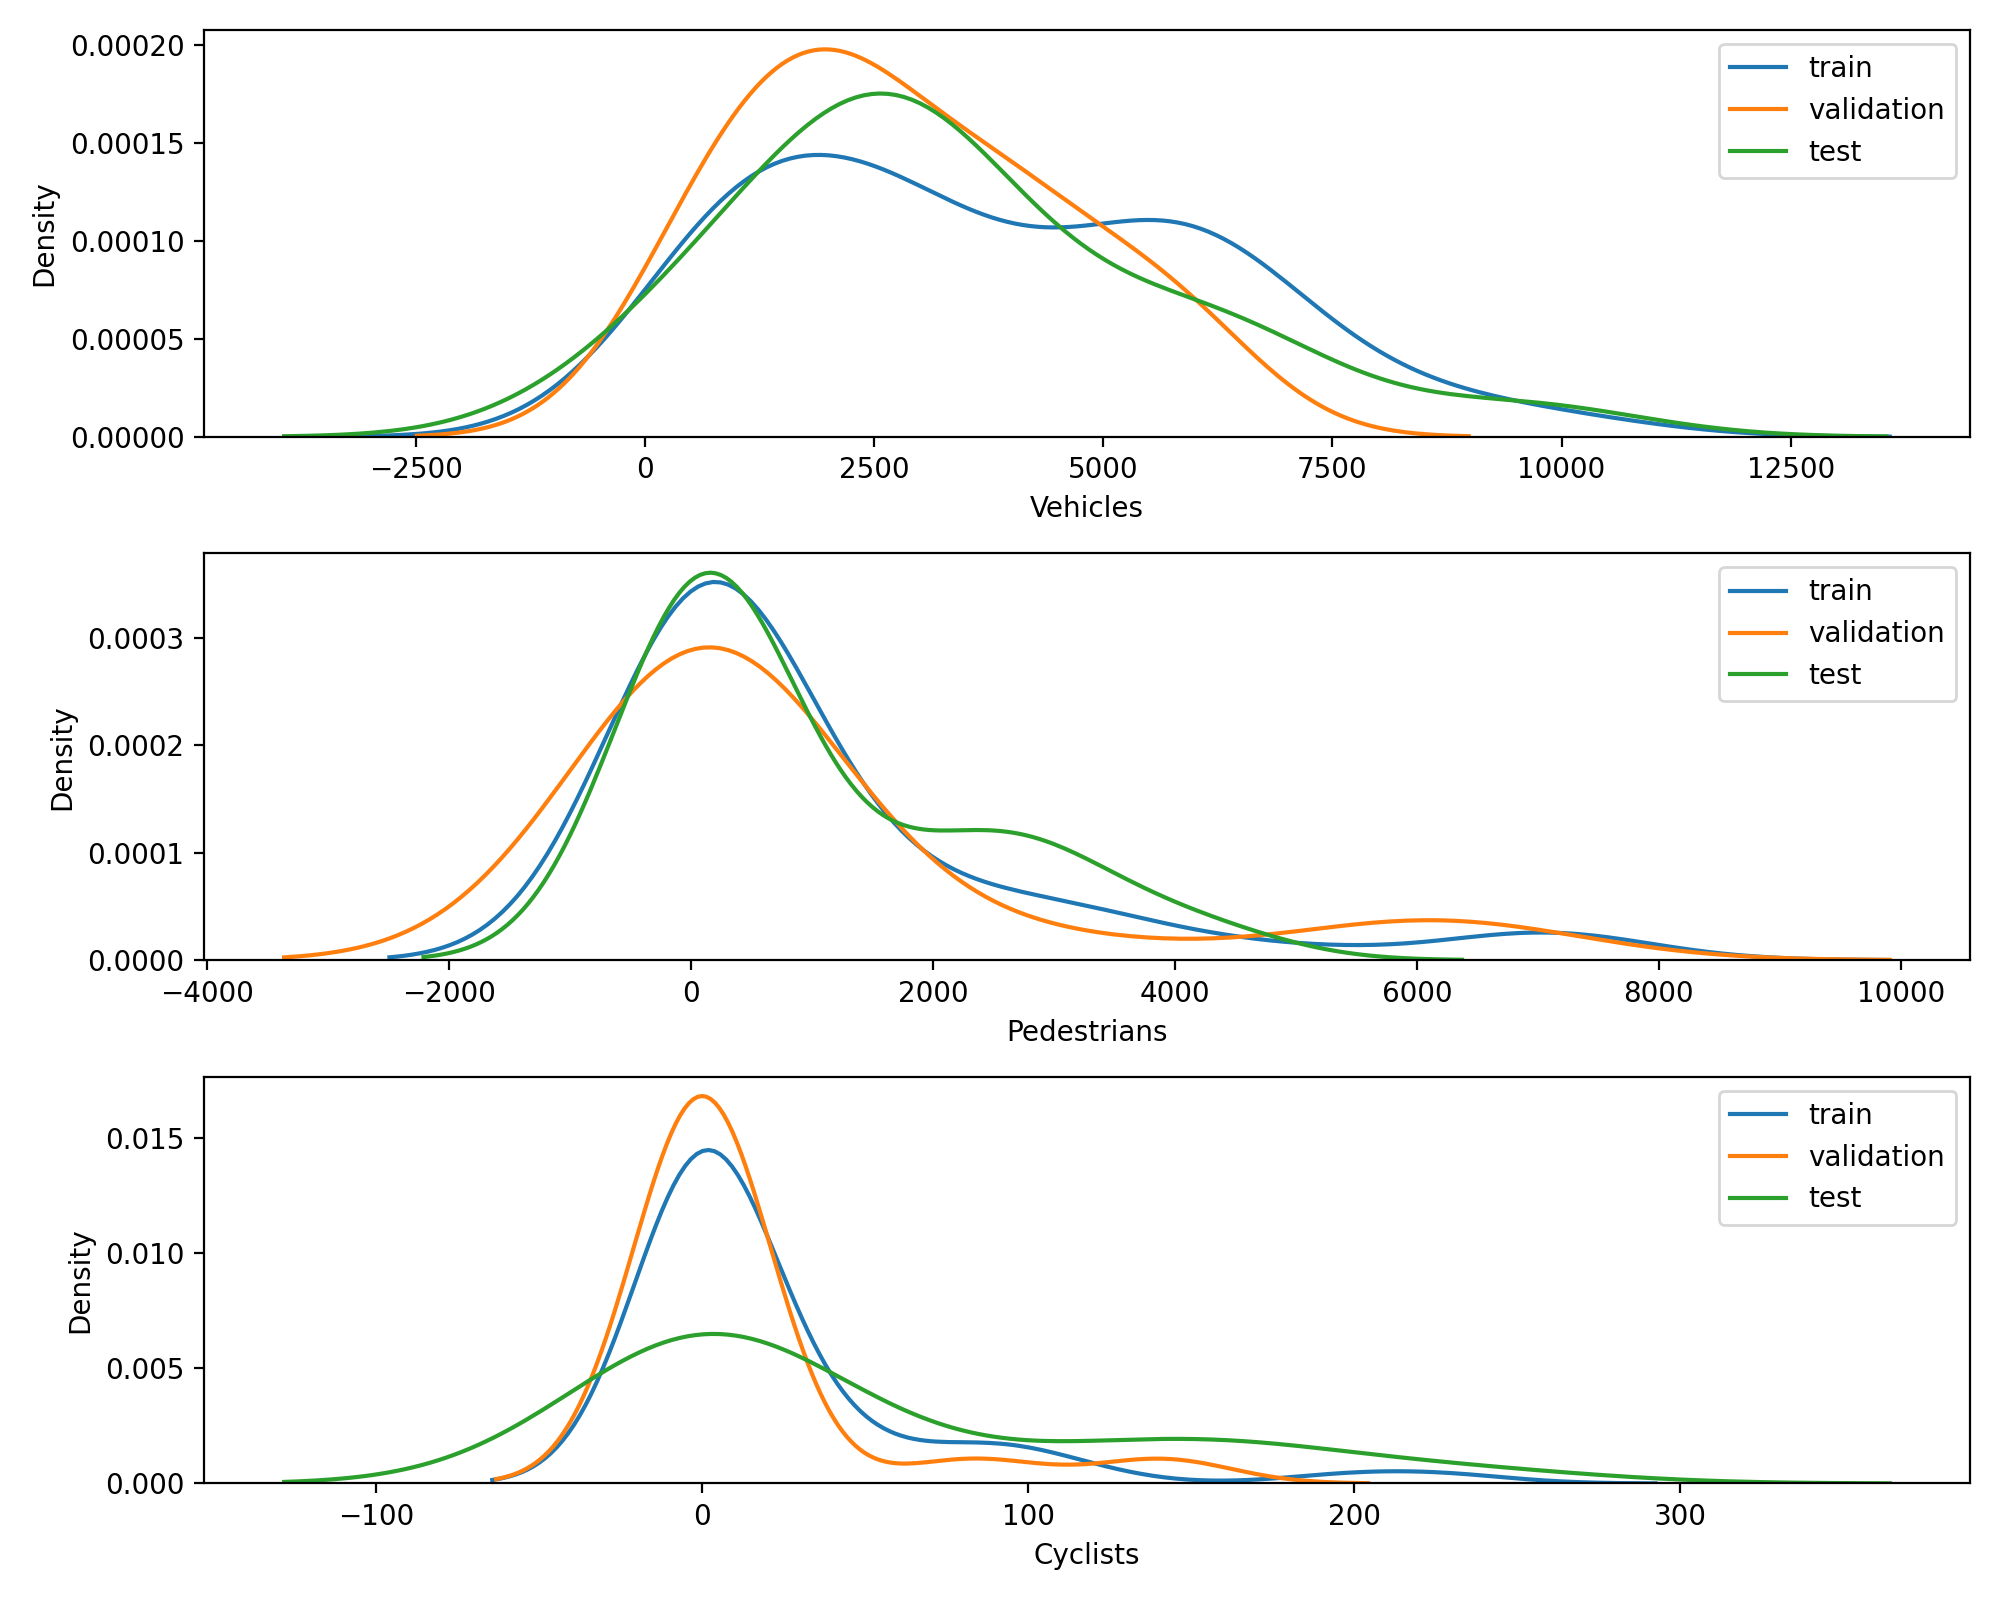

In [190]:
fig, axs = plt.subplots(3,1,figsize = (10,8))
sns.kdeplot(df_train['Vehicles'], ax = axs[0], label = 'train')
sns.kdeplot(df_val['Vehicles'], ax = axs[0], label = 'validation')
sns.kdeplot(df_test['Vehicles'], ax = axs[0], label = 'test')
axs[0].legend()

sns.kdeplot(df_train['Pedestrians'], ax = axs[1], label = 'train')
sns.kdeplot(df_val['Pedestrians'], ax = axs[1], label = 'validation')
sns.kdeplot(df_test['Pedestrians'], ax = axs[1], label = 'test')
axs[1].legend()

sns.kdeplot(df_train['Cyclists'], ax = axs[2], label = 'train')
sns.kdeplot(df_val['Cyclists'], ax = axs[2], label = 'validation')
sns.kdeplot(df_test['Cyclists'], ax = axs[2], label = 'test')
axs[2].legend()

plt.tight_layout()

<IPython.core.display.Javascript object>


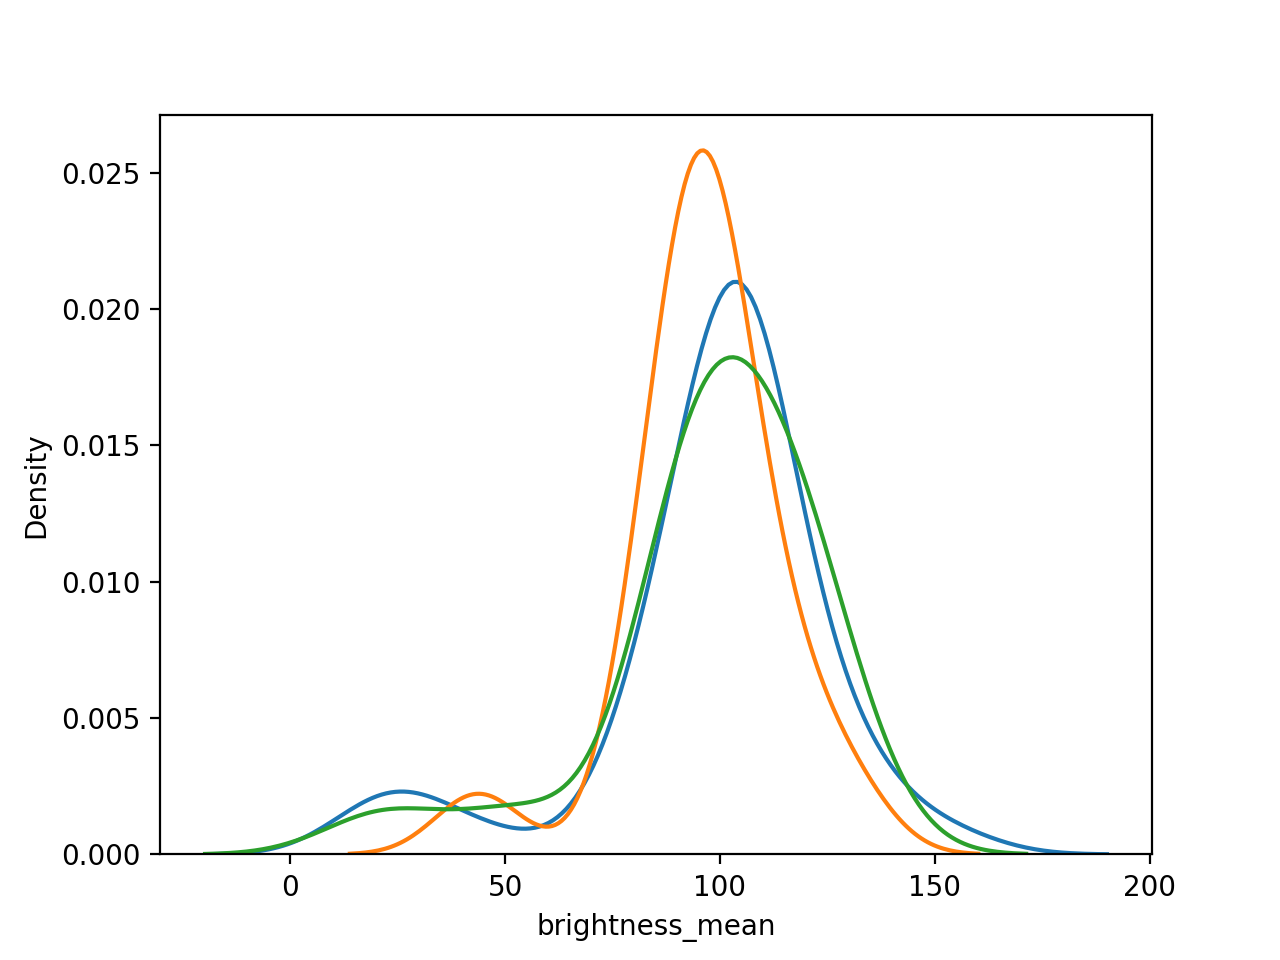

<AxesSubplot:xlabel='brightness_mean', ylabel='Density'>

In [191]:
plt.figure()
sns.kdeplot(df_train['brightness_mean'])
sns.kdeplot(df_val['brightness_mean'])
sns.kdeplot(df_test['brightness_mean'])

# Conclusion
From the probability distributions it can be observed that the shufle procedure create similar datasets for training, validation and test. It will be necessary to evaluate later on, whether it is sufficient or if we have to make use of data augmentation to increase the features that are currently under-represented

In [196]:
# Save the split in a file for later use in create_split.py

# train
file = open('train.txt', 'w')
for row in range(len(df_train)):
    file.write(df_train.iloc[row].name + '\n')
    
file.close()

# validation
file = open('validation.txt', 'w')
for row in range(len(df_val)):
    file.write(df_val.iloc[row].name + '\n')
    
file.close()

# test
file = open('test.txt', 'w')
for row in range(len(df_test)):
    file.write(df_test.iloc[row].name + '\n')
    
file.close()

In [201]:
file = open('train.txt', 'r')
for line in file:
    print(line)

file.close()

./data/waymo/segment-10770759614217273359_1465_000_1485_000_with_camera_labels.tfrecord

./data/waymo/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord

./data/waymo/segment-1191788760630624072_3880_000_3900_000_with_camera_labels.tfrecord

./data/waymo/segment-10235335145367115211_5420_000_5440_000_with_camera_labels.tfrecord

./data/waymo/segment-10500357041547037089_1474_800_1494_800_with_camera_labels.tfrecord

./data/waymo/segment-10241508783381919015_2889_360_2909_360_with_camera_labels.tfrecord

./data/waymo/segment-10206293520369375008_2796_800_2816_800_with_camera_labels.tfrecord

./data/waymo/segment-11070802577416161387_740_000_760_000_with_camera_labels.tfrecord

./data/waymo/segment-10793018113277660068_2714_540_2734_540_with_camera_labels.tfrecord

./data/waymo/segment-10444454289801298640_4360_000_4380_000_with_camera_labels.tfrecord

./data/waymo/segment-10975280749486260148_940_000_960_000_with_camera_labels.tfrecord

./data/waymo/segment-102319